# Probabilidad y Estadística (C)
## Trabajo Práctico 2 

#### Alumno: Leandro Carreira
#### LU: 669/18

<img src="img/1.png" width=700 align="left">

### Estimador de momentos:

Uso el **primer** momento, pues si $b > 0$ con $X_n \sim \mathcal{U}[0,b]$ \,

\begin{equation*}
E [X_n] = \int_{0}^{b} x_i * \frac{1}{b} * dx
\end{equation*}

\begin{equation*}
= \frac{1}{b} * \left[ \frac{x^2_i}{2}\right]^b_0
\end{equation*}

\begin{equation*}
= \frac{b^2}{2b}
\end{equation*}

\begin{equation*}
E [X_n] = \frac{b}{2}
\end{equation*}

\begin{equation*}
\hat{b}_{mom} = 2 * E [X_n]
\end{equation*}

In [269]:
# Función estimadora de primeros momentos
bmom1 = function(muestra){
    2*mean(muestra)
}

Similarmente se puede calcular el EM con el **segundo** momento, al cual también voy a agregar en los siguientes ejercicios del TP, pues me parece una comparación interesante (no solo entre diferentes estimadores, sino también entre un mismo tipo, usando dos grados distintos):

\begin{equation*}
E [X_n^2] = \int_{0}^{b} x_i^2 * \frac{1}{b} * dx
\end{equation*}

\begin{equation*}
= \frac{1}{b} * \left[ \frac{x^3_i}{3}\right]^b_0
\end{equation*}

\begin{equation*}
= \frac{b^3}{3b}
\end{equation*}

\begin{equation*}
E [X_n] = \frac{b^2}{3}
\end{equation*}

\begin{equation*}
\hat{b}^2 = 3 * E [X_n]
\end{equation*}

\begin{equation*}
 _{b\, >\, 0}
\end{equation*}

\begin{equation*}
\hat{b}_{mom2} = \sqrt{3 * E [X_n]}
\end{equation*}

In [270]:
# Función estimadora de segundos momentos
bmom2 = function(muestra){
    n <- length(muestra)
    sqrt(3 * mean(muestra^2))
}

### Estimador de Máxima Verosimilitud

(éste no lo escribo en latex porque sino lo entrego en el 2020)

<img src="img/emv1.jpg" width=700 align="left">

<img src="img/emv2.jpg" width=700 align="left">

In [271]:
# Estimador de maxima verosimilitud
bmv = function(muestra){
    max(muestra)
}

<img src="img/2.png" width=700 align="left">

In [272]:
bmed = function(muestra){
    2*median(muestra)
}

<img src="img/3.png" width=700 align="left">

In [273]:
b <- 1
n <- 15
muestra <- runif(n, min=0, max=b)

### Valores estimados:

In [274]:
bmom1(muestra)
bmom2(muestra)
bmv(muestra)
bmed(muestra)

[1] 1,143602

[1] 1,075822

[1] 0,9236559

[1] 1,060951

### Errores:

mom1,mom2,max.ver,mediana
"-0,1436","-0,07582","0,07634","-0,06095"


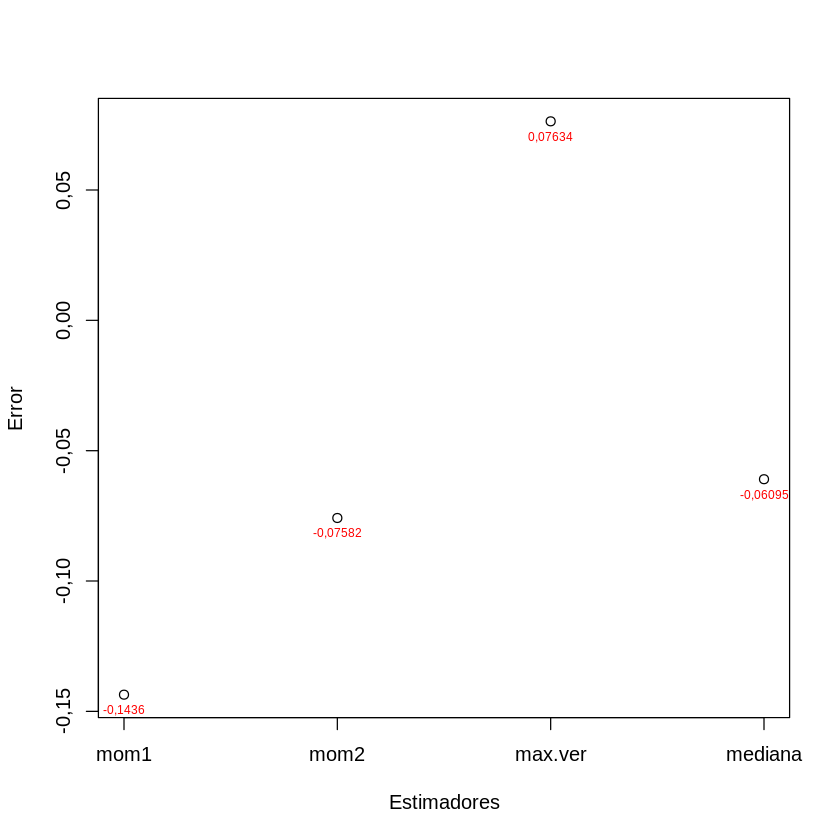

In [275]:
# Calculo errores
error_momento_1 <- b - bmom1(muestra)
error_momento_2 <- b - bmom2(muestra)
error_max_ver   <- b - bmv(muestra)
error_mediana   <- b - bmed(muestra)
# Agrupo datos para plot
errores <- c(error_momento_1, error_momento_2, error_max_ver,error_mediana)
nombres <- c('mom1','mom2','max.ver','mediana')
# Imprimo y ploteo errores para una mejor comparación
matrix(c(nombres, round(errores,5)), nrow=2, ncol=4, byrow=TRUE)
# Plot
#options(repr.plot.width=7, repr.plot.height=7)
plot(errores, xlab="Estimadores", ylab="Error", xaxt='n')
text(errores, as.character(round(errores,5)), cex=0.6, pos=1, col="red")
axis(1, c(1,2,3,4), nombres) 

<img src="img/4.png" width=700 align="left">

In [276]:
experimento = function(){
    # a)
    b <- 1
    n <- 15
    muestra <- runif(n, min=0, max=b)
    # b)
    b_mom1 <- bmom1(muestra)
    b_mom2 <- bmom2(muestra)
    b_mv  <- bmv(muestra)
    b_med <- bmed(muestra)
    #devuelvo un vector de estimadores
    c(b_mom1, b_mom2, b_mv, b_med)
}

In [277]:
# c)
nrep <- 1000
estimadores <- array(dim=c(nrep,4), dimnames=list(1:nrep, c("b_mom1", "b_mom2", "b_mv", "b_med")))
for(i in 1:nrep){
    estimadores[i,] <- array(experimento())
}

In [278]:
# Estimaciones guardadas de cada experimento
estimadores[2:4,]
estimadores[997:1000,]

,b_mom1,b_mom2,b_mv,b_med
2,"0,9950695","0,9715184","0,9578789","1,020163"
3,"1,0214977","0,9962472","0,8763557","1,103555"
4,"1,1266438","1,0604328","0,9950194","1,121610"


,b_mom1,b_mom2,b_mv,b_med
997,"1,0809541","1,0657136","0,9840457","1,1238396"
998,"0,8782375","0,8768865","0,8860196","0,8112392"
999,"0,9536297","0,9742268","0,8756847","1,0641921"
1000,"0,8541802","0,9121261","0,9823732","0,8084063"


#### Sesgo:

In [279]:
# d)
# aplico mean a cada columna (estimador) de mi data
b_muestrales <- apply(estimadores, MARGIN=2, FUN=mean)
b_muestrales

b_mom1    b_mom2      b_mv     b_med 
0,9951915 0,9902044 0,9374052 0,9942004

In [280]:
#sesgos <- medias_muestrales - b
b <- 1
sesgos <- b_muestrales - b

In [281]:
sesgos

b_mom1       b_mom2         b_mv        b_med 
-0,004808541 -0,009795578 -0,062594787 -0,005799567

#### Varianza muestral: 
Uso estimador insesgado: $S^2 =  \frac{\sum (X_i - \hat{\mu} )^2}{n-1}$

In [282]:
# e)
#varianzas_muestrales <- ((medias_muestrales-b/2)^2)/(n-1)
varianzas_muestrales <- ((b_muestrales/2-b/2)^2)/(n-1)

In [283]:
varianzas_muestrales

b_mom1       b_mom2         b_mv        b_med 
4,128941e-07 1,713452e-06 6,996620e-05 6,006247e-07

#### Error Cuadrático Medio:

In [284]:
# f) Aproximación del Error Cuadratico Medio (ECM)
ECM <- varianzas_muestrales + sesgos^2
ECM

b_mom1       b_mom2         b_mv        b_med 
2,353496e-05 9,766679e-05 3,988074e-03 3,423561e-05

<img src="img/5.png" width=700 align="left">

In [285]:
# Funciones simuladoras:
# Devuelven sesgo y varianza aproximados
# promediando 1000 experimentos
# con Estimador de Maxima Verosimilitud
simulacion_mv = function(b, n){
    nE <- 1000
    # Guardo todas las estimaciones
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmv(muestra)
        # Guardo b estimado para calcular Sesgo luego
        all_b_est[i] <- b_est
        # Calculo varianza muestral, usando b estimado
        mean_muestral <- b_est/2
        varianza[i] <- (sum((muestra - mean_muestral)^2)) / (n-1)
    }
    # Calculo Sesgo y Varianza usando todas las muestras
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- mean(varianza)
    return(c(sesgo_est, varianza_est))
}

# con Estimador de 1er Momento
simulacion_mom = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmom1(muestra)
        all_b_est[i] <- b_est
        mean_muestral <- b_est/2
        varianza[i] <- (sum((muestra - mean_muestral)^2)) / (n-1)
    }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- mean(varianza)
    return(c(sesgo_est, varianza_est))
}

# Agrego también simulación de 2do momento
simulacion_mom2 = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmom1(muestra)
        all_b_est[i] <- b_est
        mean_muestral <- b_est/2
        varianza[i] <- (sum((muestra - mean_muestral)^2)) / (n-1)
        }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- mean(varianza)
    return(c(sesgo_est, varianza_est))
}

# con Mediana de la muestra
simulacion_med = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        b_est <- bmed(muestra)
        all_b_est[i] <- b_est
        mean_muestral <- b_est/2
        varianza[i] <- (sum((muestra - mean_muestral)^2)) / (n-1)
        }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- mean(varianza)
    return(c(sesgo_est, varianza_est))
}

<img src="img/6.png" width=700 align="left">

In [286]:
# Calculo sesgos, varianzas y ECM para 20 valores
# distintos de b entre 0 y 2 (no inclusives)
nB <- 20
b_values <- seq(0.1, 1.9, by=1.8/(nB-1))
# nB filas, 3 columnas: (bias, var, ECM)
results_mv   <- matrix(nrow=nB, ncol=3)
results_mom  <- matrix(nrow=nB, ncol=3)
results_mom2 <- matrix(nrow=nB, ncol=3)
results_med  <- matrix(nrow=nB, ncol=3)

for (i in 1:nB){
    b <- b_values[i]
    results_mv[i,1:2]   <- simulacion_mv(b, 15)
    results_mom[i,1:2]  <- simulacion_mom(b, 15)
    results_mom2[i,1:2] <- simulacion_mom2(b, 15)
    results_med[i,1:2]  <- simulacion_med(b, 15)
    # ECM = Var + Sesgo^2
    results_mv[i,3]   <- results_mv[i,1]^2   + results_mv[i,2]
    results_mom[i,3]  <- results_mom[i,1]^2  + results_mom[i,2]
    results_mom2[i,3] <- results_mom2[i,1]^2 + results_mom2[i,2]
    results_med[i,3]  <- results_med[i,1]^2  + results_med[i,2]
}

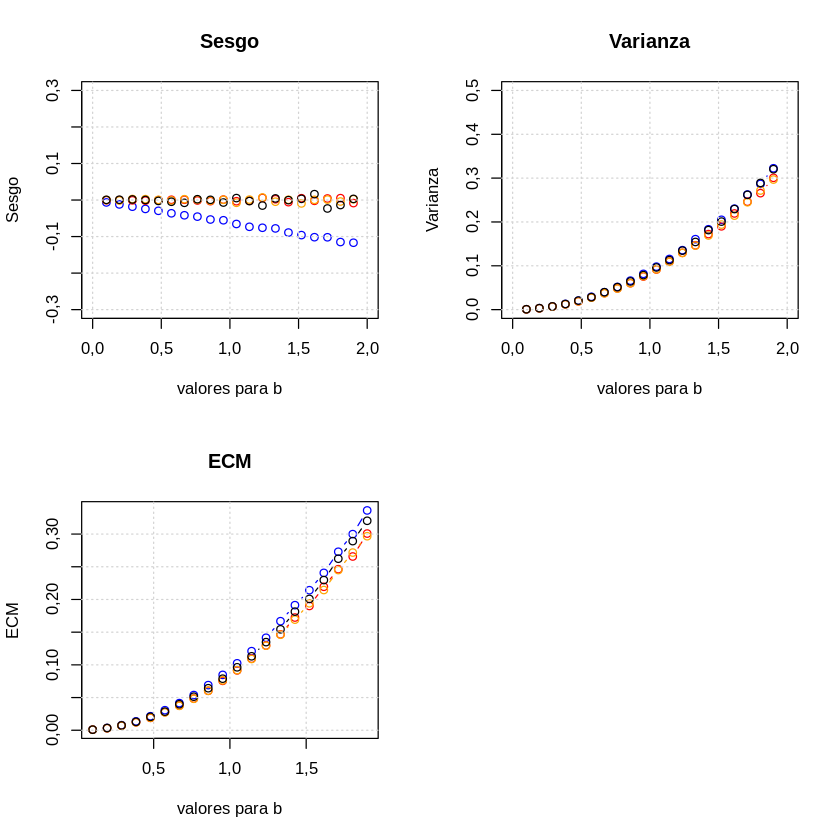

In [287]:
par(mfrow=c(2,2))
# Sesgos
plot(b_values, results_mv[,1], ylim=c(-0.3,0.3), xlim=c(0,2),
     col="blue", main="Sesgo", xlab="valores para b", ylab="Sesgo", type="b")
points(b_values, results_mom[,1], col="red", type="b")
points(b_values, results_mom2[,1], col="orange", type="b")
points(b_values, results_med[,1], col="black", type="b")
grid()
# Varianzas
plot(b_values, results_mv[,2], ylim=c(0,0.5), xlim=c(0,2),
     col="blue", main="Varianza", xlab="valores para b", ylab="Varianza", type="b")
points(b_values, results_mom[,2], col="red", type="b")
points(b_values, results_mom2[,2], col="orange", type="b")
points(b_values, results_med[,2], col="black", type="b")
grid()
# ECM = Var^2 + Sesgo^2
plot(b_values, results_mv[,3], col="blue", main="ECM", xlab="valores para b", ylab="ECM", type="b")
points(b_values, results_mom[,3], col="red", type="b")
points(b_values, results_mom2[,3], col="orange", type="b")
points(b_values, results_med[,3], col="black", type="b")
grid()

### Observaciones:

* A medida que aumento b (manteniendo el tamaño de muestra), todos los estimadores aumentan tanto sesgo, como varianza y ECM.

* Ésto es de esperarse ya que para un b cercano a cero, los valores que serán simulados en la muestra estarán muy acotados, mientras que al incrementar b, podrán aparecer valores más grandes en la muestra, y por ende, haber diferencias más grandes en las estimaciones.

### Decisiones:

* Es difícil estar seguro en cuanto a decisiones con una muestra tan pequeña, pero se puede observar que el EMV tiene un sesgo negativo **bastante más notable** que en los otros estimadores (donde el sesgo es nulo), por lo que para este tamaño de muestra, usaría cualquier otro estimador para evitar ese sesgo (EM, EM2 o Mediana).


<img src="img/7.png" width=700 align="left">

In [288]:
# Calculo sesgos, varianzas para distintos valores de n
n_values <- c(15, 30, 60, 120, 240)
nN <- length(n_values)
# nN filas, 4 columnas: (n, Sesgo, Var, ECM)
results_mv   <- matrix(nrow=nN, ncol=4)
results_mom  <- matrix(nrow=nN, ncol=4)
results_mom2 <- matrix(nrow=nN, ncol=4)
results_med  <- matrix(nrow=nN, ncol=4)

for (i in 1:nN){
    n <- n_values[i]
    # Guardo n en [1]
    results_mv[i,1]   <- n
    results_mom[i,1]  <- n
    results_mom2[i,1] <- n
    results_med[i,1]  <- n
    # Guardo Sesgos[2] y Varianzas[3] para graficarlos
    results_mv[i,2:3]   <- simulacion_mv(1, n)
    results_mom[i,2:3]  <- simulacion_mom(1, n)
    results_mom2[i,2:3] <- simulacion_mom2(1, n)
    results_med[i,2:3]  <- simulacion_med(1, n)
    # ECM[4] = Var + Sesgo^2
    results_mv[i,4]   <- results_mv[i,2]^2   + results_mv[i,3]
    results_mom[i,4]  <- results_mom[i,2]^2  + results_mv[i,3]
    results_mom2[i,4] <- results_mom2[i,2]^2 + results_mv[i,3]
    results_med[i,4]  <- results_med[i,2]^2  + results_mv[i,3]
}

In [289]:
results_mv
# n   Sesgo    Varianza   ECM

15,"-0,063592752","0,08756402","0,09160806"
30,"-0,032903089","0,08595215","0,08703476"
60,"-0,015917238","0,08466022","0,08491357"
120,"-0,008595575","0,08404091","0,08411479"
240,"-0,004335527","0,08374643","0,08376522"


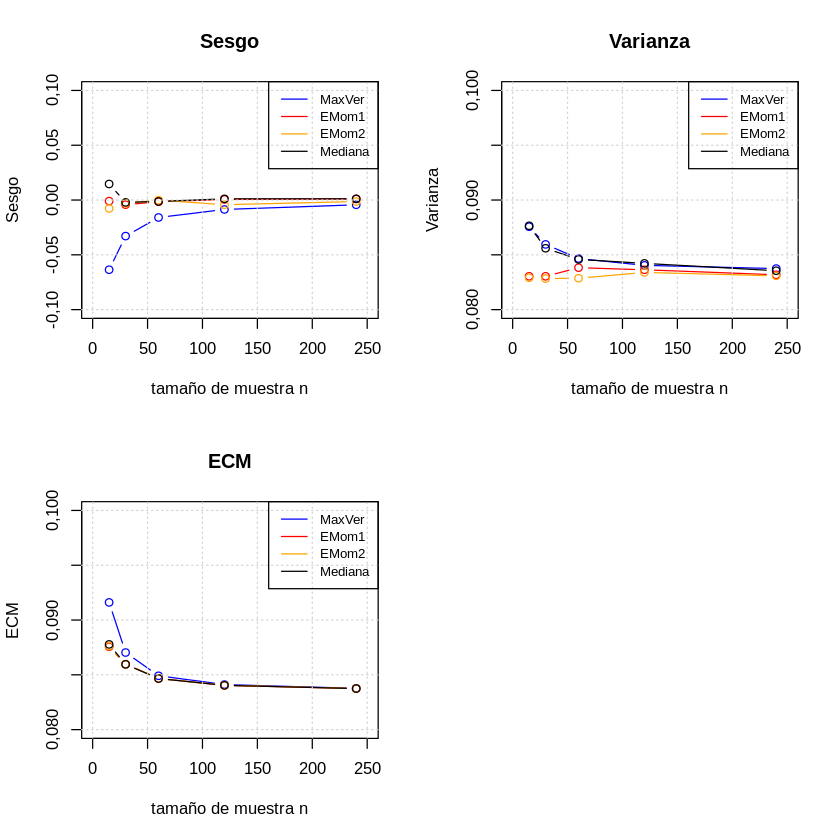

In [290]:
par(mfrow=c(2,2))
# Sesgos
plot(results_mv[,c(1,2)], ylim=c(-0.10,0.1), xlim=c(0,250),
     col="blue", main="Sesgo", xlab="tamaño de muestra n", ylab="Sesgo", type="b")
points(results_mom[,c(1,2)], col="red", type="b")
points(results_mom2[,c(1,2)], col="orange", type="b")
points(results_med[,c(1,2)], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topright", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# Varianzas
plot(results_mv[,c(1,3)], ylim=c(0.08,0.1), xlim=c(0,250),
     col="blue", main="Varianza", xlab="tamaño de muestra n", ylab="Varianza", type="b")
points(results_mom[,c(1,3)], col="red", type="b")
points(results_mom2[,c(1,3)], col="orange", type="b")
points(results_med[,c(1,3)], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topright", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# ECM 
plot(results_mv[,c(1,4)], col="blue", main="ECM", xlab="tamaño de muestra n", ylab="ECM", type="b", ylim=c(0.08,0.1), xlim=c(0,250))
points(results_mom[,c(1,4)], col="red", type="b")
points(results_mom2[,c(1,4)], col="orange", type="b")
points(results_med[,c(1,4)], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topright", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)

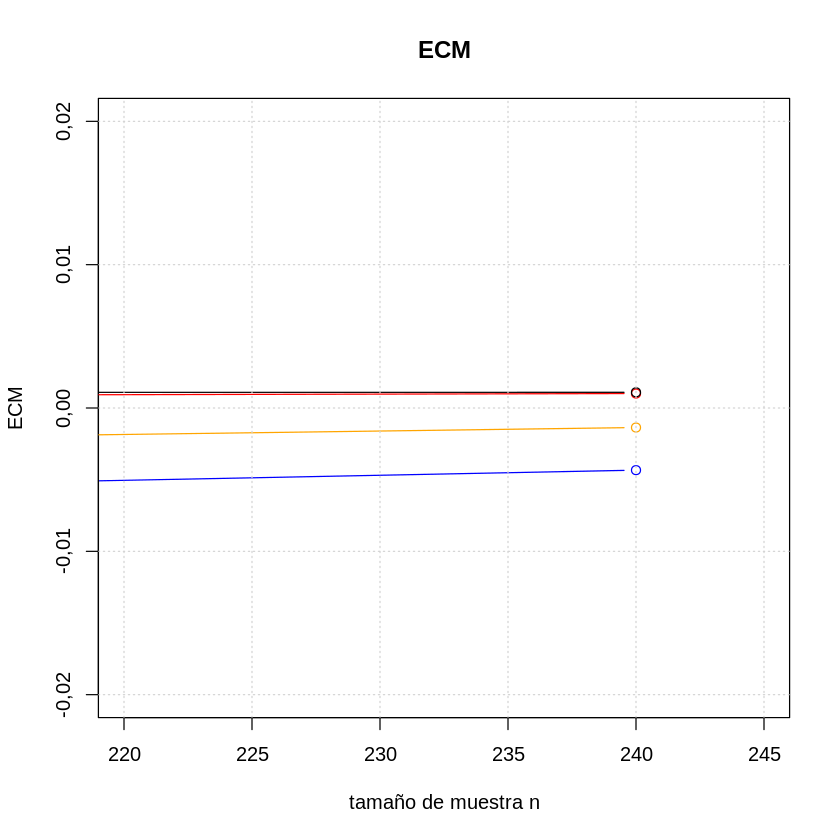

In [291]:
# Zoom en mayor n alcanzado
plot(results_mv, ylim=c(-0.02, 0.02), xlim=c(220,245),
     col="blue", main="ECM", xlab="tamaño de muestra n", ylab="ECM", type="b")
points(results_mom, col="red", type="b")
points(results_mom2, col="orange", type="b")
points(results_med, col="black", type="b")
grid()

### Observaciones:

* Todos los estimadores parecen converger (al menos de manera asintótica) a cero a medida que se aumenta el tamaño de la muestra, de tener un tamaño de muestra grande, cualquier estimador devolvería buenas estimaciones, mientras que para tamaños de muestra más pequeños, sería un poco más cauteloso e iría por los estimadores de momento, que parecen devolver buenos resultados a pesar de ello (como fue observado más arriba).

<img src="img/8.png" width=700 align="left">

In [292]:
X <- c(0.917, 0.247, 0.384, 0.530, 0.798,
       0.912, 0.096, 0.684, 0.394, 20.1,
       0.769, 0.137, 0.352, 0.332, 0.670)

In [293]:
b_mv <- bmv(X)
b_mom <- bmom1(X)
b_mom2 <- bmom2(X)
b_med <- bmed(X)

In [294]:
b_mv
b_mom
b_mom2
b_med

[1] 20,1

[1] 3,642933

[1] 9,041397

[1] 1,06

### Observaciones:
* Tanto revisando la data como gradicando un boxplot, se ve que el error es debido a un outlier de un valor 40 veces mayor al resto de la muestra.

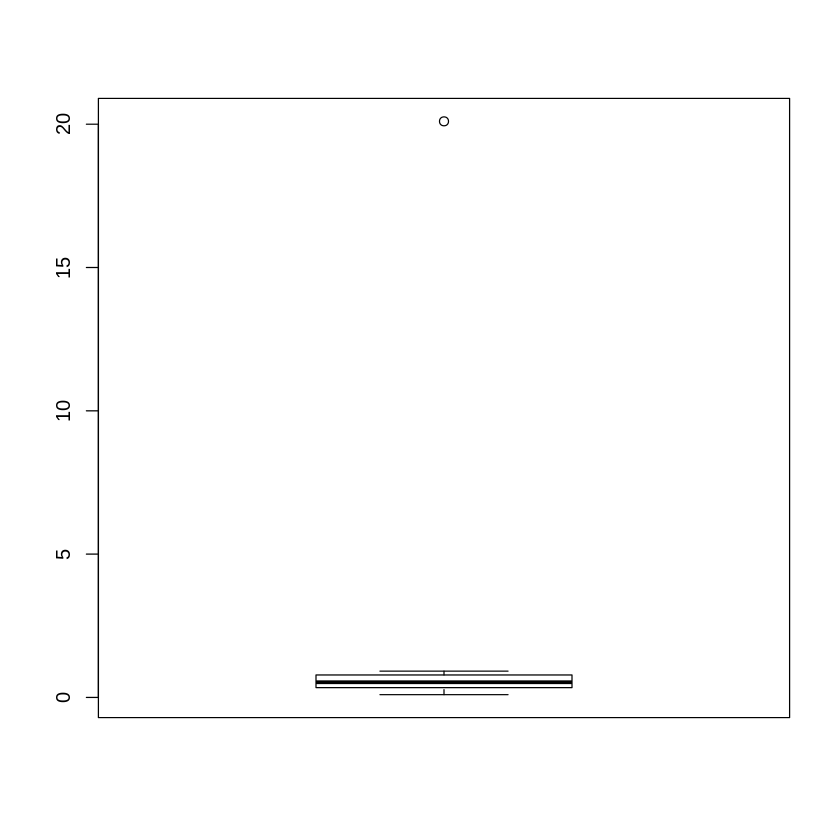

In [295]:
boxplot(X)

* Una vez comprobado que sea un outlier, podemos 'reparar' nuestra muestra eliminando el valor fuera de rango, y calcular los estimadores con el resto de la muestra, como se realiza a continuación:

In [296]:
X_fixed <- c(0.917, 0.247, 0.384, 0.530, 0.798,
       0.912, 0.096, 0.684, 0.394,
       0.769, 0.137, 0.352, 0.332, 0.670)

In [297]:
b_mv <- bmv(X_fixed)
b_mom <- bmom1(X_fixed)
b_mom2 <- bmom2(X_fixed)
b_med <- bmed(X_fixed)

In [298]:
b_mv
b_mom
b_mom2
b_med

[1] 0,917

[1] 1,031714

[1] 1,006153

[1] 0,924

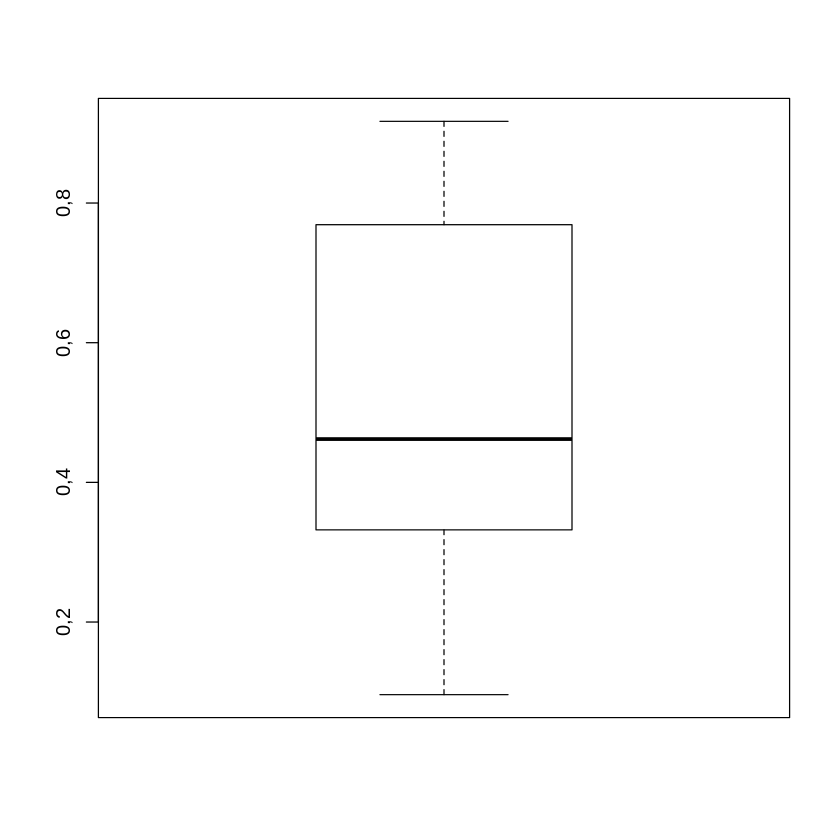

In [299]:
boxplot(X_fixed)

<img src="img/9.png" width=700 align="left">

In [300]:
n <- 15
b <- 1
X <- runif(n, 0, b)

In [301]:
# Minicódigo a implementar en funciones simuladoras
X_cont <- X
# Contamino cada elemento con proba 0.005
for(i in 1:n){
    pC <- 0.005 # 1/200
    if(runif(1) < pC){
        
        X_cont[i] <- X_cont[i] * 100
    }
}

# De manera más eficiente (y bonita :)
pC <- 1/200
mask <- runif(n)
X_cont[mask<pC] <- X_cont[mask<pC] * 100

#### a) Proba de que la muestra esté contaminada:

Cada elemento tiene $p=\frac{1}{200}=0.005$ de ser contaminado, por lo que la probabilidad de que la muestra esté contaminada es de $\frac{n}{200}$, siendo $n$ la cantidad de elementos de la muestra.

Para nuestro caso de 15 elementos, la probabilidad de una muestra contaminada será de: $\frac{15}{200} = \frac{3}{40} = 0.075$ lo cual sigue pareciendo un valor pequeño.

Pero qué pasará si necesitamos tomar una gran cantidad de muestras de la misma fuente con posible contaminación? (es una pregunta retórica)

#### b) Aproximaciones obtenidas:


In [302]:
# Funciones simuladoras CON CONTAMINACIÓN:
# Devuelven sesgo y varianza aproximados
# promediando 1000 experimentos
# con Estimador de Maxima Verosimilitud
simulacion_mv_cont = function(b, n){
    nE <- 1000
    # Guardo todas las estimaciones
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # --[Contaminación con proba pC]--
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # --[Fin contaminación]--
        b_est <- bmv(muestra)
        # Guardo b estimado para calcular Sesgo luego
        all_b_est[i] <- b_est
        # Calculo varianza muestral, usando b estimado
        mean_muestral <- b_est/2
        varianza[i] <- (sum((muestra - mean_muestral)^2)) / (n-1)
    }
    # Calculo Sesgo y Varianza usando todas las muestras
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- mean(varianza)
    return(c(sesgo_est, varianza_est))
}

# con Estimador de 1er Momento
simulacion_mom_cont = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # --[Contaminación con proba pC]--
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # --[Fin contaminación]--
        b_est <- bmom1(muestra)
        all_b_est[i] <- b_est
        mean_muestral <- b_est/2
        varianza[i] <- (sum((muestra - mean_muestral)^2)) / (n-1)
    }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- mean(varianza)
    return(c(sesgo_est, varianza_est))
}

# Agrego también simulación de 2do momento
simulacion_mom2_cont = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # --[Contaminación con proba pC]--
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # --[Fin contaminación]--
        b_est <- bmom1(muestra)
        all_b_est[i] <- b_est
        mean_muestral <- b_est/2
        varianza[i] <- (sum((muestra - mean_muestral)^2)) / (n-1)
        }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- mean(varianza)
    return(c(sesgo_est, varianza_est))
}

# con Mediana de la muestra
simulacion_med_cont = function(b, n){
    nE <- 1000
    all_b_est <- vector(length=nE)
    varianza <- vector(length=nE)
    for (i in 1:nE){
        muestra <- runif(n, min=0, max=b)
        # --[Contaminación con proba pC]--
        pC <- 1/200
        mask <- runif(n)
        muestra[mask<pC] <- muestra[mask<pC] * 100
        # --[Fin contaminación]--
        b_est <- bmed(muestra)
        all_b_est[i] <- b_est
        mean_muestral <- b_est/2
        varianza[i] <- (sum((muestra - mean_muestral)^2)) / (n-1)
        }
    sesgo_est <- mean(all_b_est) - b
    varianza_est <- mean(varianza)
    return(c(sesgo_est, varianza_est))
}

In [303]:
# Calculo sesgos, varianzas y ECM para 20 valores
# distintos de b entre 0 y 2 (no inclusives)
nB <- 20
b_values <- seq(0.1, 1.9, by=1.8/(nB-1))
# nB filas, 3 columnas: (bias, var, ECM)
results_mv   <- matrix(nrow=nB, ncol=3)
results_mom  <- matrix(nrow=nB, ncol=3)
results_mom2 <- matrix(nrow=nB, ncol=3)
results_med  <- matrix(nrow=nB, ncol=3)

for (i in 1:nB){
    b <- b_values[i]
    # Guardo Sesgo y Varianza para cada b
    results_mv[i,1:2]   <- simulacion_mv_cont(b, 15)
    results_mom[i,1:2]  <- simulacion_mom_cont(b, 15)
    results_mom2[i,1:2] <- simulacion_mom2_cont(b, 15)
    results_med[i,1:2]  <- simulacion_med_cont(b, 15)
    # Calculo ECM = Sesgo^2 + Var
    results_mv[i,3] <- results_mv[i,1]^2+results_mv[i,2]
    results_mom[i,3] <- results_mom[i,1]^2+results_mom[i,2]
    results_mom2[i,3] <- results_mom2[i,1]^2+results_mom2[i,2]
    results_med[i,3] <- results_med[i,1]^2+results_med[i,2]
}

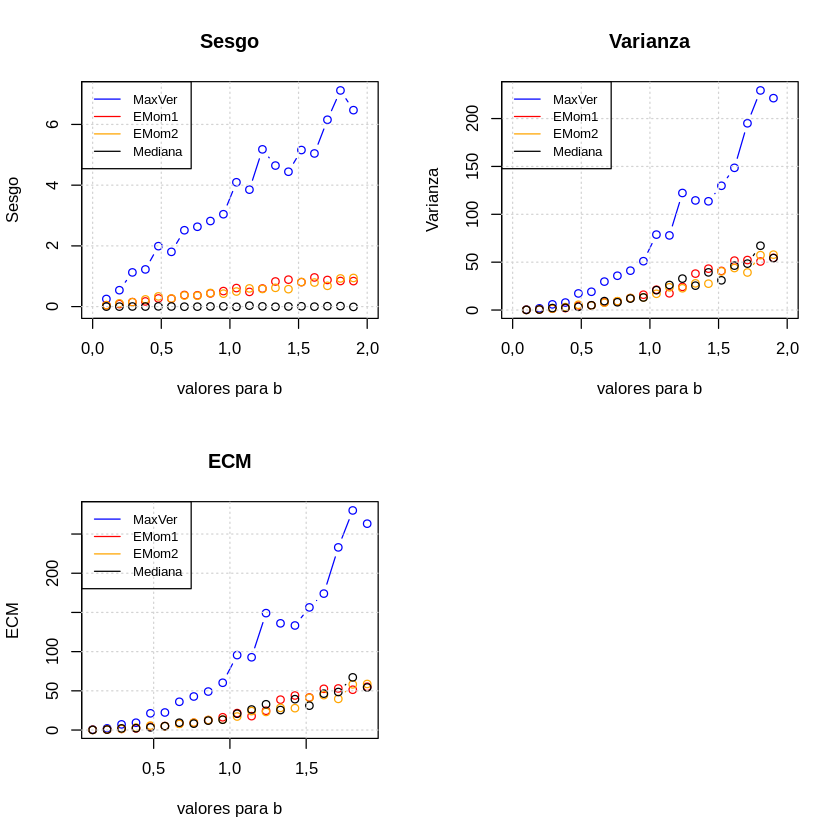

In [304]:
par(mfrow=c(2,2))
# Plot para Sesgos
ylim <- c(-0.1, max(results_mv[,1]))
plot(b_values, results_mv[,1], xlim=c(0,2), ylim=ylim, 
     col="blue", main="Sesgo", xlab="valores para b", ylab="Sesgo", type="b")
points(b_values, results_mom[,1], col="red", type="b")
points(b_values, results_mom2[,1], col="orange", type="b")
points(b_values, results_med[,1], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topleft", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# Plot para Varianzas
plot(b_values, results_mv[,2], xlim=c(0,2),
     col="blue", main="Varianza", xlab="valores para b", ylab="Varianza", type="b")
points(b_values, results_mom[,2], col="red", type="b")
points(b_values, results_mom2[,2], col="orange", type="b")
points(b_values, results_med[,2], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topleft", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)
# Plot para ECM
plot(b_values, results_mv[,3], col="blue", main="ECM", xlab="valores para b", ylab="ECM", type="b")
points(b_values, results_mom[,3], col="red", type="b")
points(b_values, results_mom2[,3], col="orange", type="b")
points(b_values, results_med[,3], col="black", type="b")
grid()
transpa_color <- rgb(0, 0, 0, max = 255, alpha = 0, names = "transparent")
legend("topleft", bg=transpa_color,legend=c("MaxVer", "EMom1", "EMom2", "Mediana"),
       col=c("blue", "red", "orange", "black"), lty=1, cex=0.8,
       box.lty=1)

#### c) Qué estimador prefiero?

* En este caso la muestra está contaminada de una forma particular: con esporádicos valores muy por encima de la media.

 Se observa en los gráficos que el estimador de Máxima Verosimilitud es **MUY** (en mayúsculas, negrita, y si pudiera subrayarlo también lo haría) sensible a outliers, dado que utiliza el máximo valor de cada muestra como estimación de b, ignorando todos los otros valores.
 
 Ésto resulta en estimaciones catastróficas por más que se tenga una muestra de 10 millones de valores cercano a 1.0, y un único outlier muy por encima de éste número: El EMV solo usará la información de este último, errando completamente su estimación.
 
 Los otros tres estimadores (ambos de Momentos, y Mediana) parecen ser mucho más consistentes con el resto de la data, en especial el estimador de Mediana al observar su Sesgo: Es básicamente inmune a este tipo de contaminación.
 
 